<a href="https://colab.research.google.com/github/nilotpalc/Py_DS_ML_Bootcamp-Master/blob/master/KerasLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
# how to load a sqlite dabase in the workspace in colab
import sqlite3
conn = sqlite3.connect('/content/modeldata_loaninfo.db')

In [3]:
import numpy as np
import pandas as pd
df = pd.read_parquet('/content/sample_data/kerasmodel.parquet')
df.head()

,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util_new,total_acc,mort_acc_new,...,MORTGAGE,OWN,OTHER,ANY,Not Verified,Source Verified,w,f,INDIVIDUAL,JOINT
0,0.238411,0.206493,0.013438,0.002624,0.177778,0.0,0.020863,0.046845,0.154362,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.259836,0.164456,0.007466,0.002205,0.188889,0.0,0.011548,0.059733,0.167785,0.088235,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.201402,0.323437,0.004945,0.001279,0.144444,0.0,0.006876,0.103328,0.161074,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.045578,0.134787,0.006202,0.000260,0.066667,0.0,0.003139,0.024095,0.073826,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.465524,0.390880,0.006317,0.003395,0.144444,0.0,0.014102,0.078225,0.275168,0.029412,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   int_rate          396030 non-null  float64
 1   installment       396030 non-null  float64
 2   annual_inc        396030 non-null  float64
 3   dti               396030 non-null  float64
 4   open_acc          396030 non-null  float64
 5   pub_rec           396030 non-null  float64
 6   revol_bal         396030 non-null  float64
 7   revol_util_new    396030 non-null  float64
 8   total_acc         396030 non-null  float64
 9   mort_acc_new      396030 non-null  float64
 10  sub_grade_number  396030 non-null  float64
 11  loan_repaid_key   396030 non-null  float64
 12  36 months         396030 non-null  float64
 13  B                 396030 non-null  float64
 14  A                 396030 non-null  float64
 15  C                 396030 non-null  float64
 16  E                 39

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['loan_repaid_key','f'],axis=1),
  df['loan_repaid_key'].astype(int), test_size=0.30,
  random_state=101)

In [7]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 277221 entries, 71129 to 176991
Series name: loan_repaid_key
Non-Null Count   Dtype
--------------   -----
277221 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [8]:
model = Sequential()

# input layer
model.add(Dense(29,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [10]:
model.fit(x=X_train,
          y=y_train,
          epochs=550,
          batch_size=128,
          validation_data=(X_test, y_test),\
          callbacks=[early_stop]
          )

Epoch 1/550
2166/2166 [==============================] - 12s 4ms/step - loss: 0.4751 - val_loss: 0.4572
Epoch 2/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4619 - val_loss: 0.4564
Epoch 3/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4598 - val_loss: 0.4561
Epoch 4/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4589 - val_loss: 0.4561
Epoch 5/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4583 - val_loss: 0.4554
Epoch 6/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4577 - val_loss: 0.4548
Epoch 7/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4575 - val_loss: 0.4551
Epoch 8/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4571 - val_loss: 0.4547
Epoch 9/550
2166/2166 [==============================] - 8s 4ms/step - loss: 0.4569 - val_loss: 0.4547
Epoch 10/550
2166/2166 [==============================] - 8s 4ms/step - 

<Axes: >

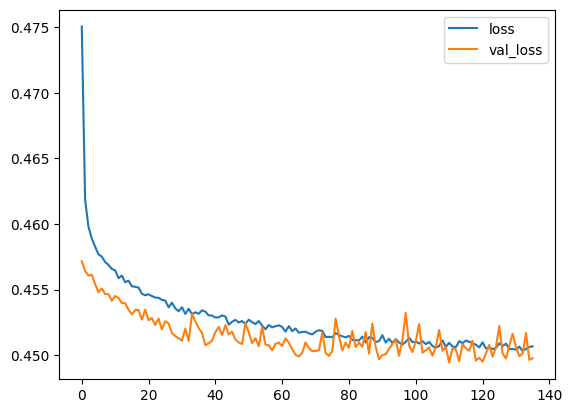

In [11]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(X_test)
predictions_rev = np.round(predictions).astype(int)

3713/3713 [==============================] - 5s 1ms/step


In [18]:
# convert all values in the "predictions" array to 0 or 1 basis the threshold of 0.5
predictions

array([[0.7446712 ],
       [0.6936945 ],
       [0.90454924],
       ...,
       [0.8936735 ],
       [0.9696885 ],
       [0.87689424]], dtype=float32)

In [19]:
np.argmax(predictions, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
print(classification_report(y_test,predictions_rev))

              precision    recall  f1-score   support

           0       0.63      0.01      0.02     23260
           1       0.81      1.00      0.89     95549

    accuracy                           0.80    118809
   macro avg       0.72      0.50      0.45    118809
weighted avg       0.77      0.80      0.72    118809

